In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

from sklearn.preprocessing import LabelEncoder
from google.colab import files
uploaded = files.upload()

Using TensorFlow backend.


Saving Sentiment.csv to Sentiment.csv


In [3]:
tbCallBack= keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0,write_graph=True, write_images=True)
data = pd.read_csv('Sentiment.csv')
# Keeping only the neccessary columns
data = data[['text','sentiment']]

data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]', '', x)))

for idx, row in data.iterrows():
    row[0] = row[0].replace('rt', ' ')

max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)

X = pad_sequences(X)

embed_dim = 128
lstm_out = 196
def createmodel():
    model = Sequential()
    model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
    model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(3,activation='softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
    return model

# print(model.summary())
labelencoder = LabelEncoder()
integer_encoded = labelencoder.fit_transform(data['sentiment'])
y = to_categorical(integer_encoded)
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

batch_size = 32
model = createmodel()
model.fit(X_train, Y_train, epochs = 3, batch_size=batch_size, verbose = 2, callbacks=[tbCallBack])
score,acc = model.evaluate(X_test,Y_test,verbose=2,batch_size=batch_size)
print(score)
print(acc)
print(model.metrics_names)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/3
 - 27s - loss: 0.8263 - accuracy: 0.6426
Epoch 2/3
 - 26s - loss: 0.6854 - accuracy: 0.7110
Epoch 3/3
 - 26s - loss: 0.6249 - accuracy: 0.7387
0.761555829849916
0.6882918477058411
['loss', 'accuracy']


**1**

In [4]:
from keras.models import load_model

model.save('model.h5')
m = load_model('model.h5')
tweet = ['A lot of good things are happening. We are respected again throughout the world, and thats a great thing.@realDonaldTrump']
tkn=tokenizer.fit_on_texts(tweet)
X= tokenizer.texts_to_sequences(tweet)
X = pad_sequences(X,maxlen=28)
result = m.predict(X)
print(result)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


[[0.91263384 0.06957214 0.01779396]]


**2**

In [6]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
import re

from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('Sentiment.csv')
# Keeping only the neccessary columns
data = data[['text','sentiment']]

data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]', '', x)))

for idx, row in data.iterrows():
    row[0] = row[0].replace('rt', ' ')

max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)

X = pad_sequences(X)

embed_dim = 128
lstm_out = 196
def createmodel():
    model = Sequential()
    model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
    model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(3,activation='softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
    return model
# print(model.summary())

labelencoder = LabelEncoder()
integer_encoded = labelencoder.fit_transform(data['sentiment'])
y = to_categorical(integer_encoded)
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

model = KerasClassifier(build_fn=createmodel, verbose=0)
batch_size = [32, 64]
epochs = [1, 2]
param_grid = dict(batch_size=batch_size, epochs=epochs)
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X_train, Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Best: 0.679867 using {'batch_size': 32, 'epochs': 2}


**3**

In [7]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

from sklearn.preprocessing import LabelEncoder
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [9]:
data = pd.read_csv('spam.csv', encoding='latin-1')
# Keeping only the neccessary columns
data = data[['v2','v1']]

data['v2'] = data['v2'].apply(lambda x: x.lower())
data['v2'] = data['v2'].apply((lambda x: re.sub('[^a-zA-z0-9\s]', '', x)))

max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['v2'].values)
X = tokenizer.texts_to_sequences(data['v2'].values)

X = pad_sequences(X)

embed_dim = 128
lstm_out = 196
def createmodel():
    model = Sequential()
    model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
    model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(2,activation='softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
    return model
# print(model.summary())

labelencoder = LabelEncoder()
integer_encoded = labelencoder.fit_transform(data['v1'])
y = to_categorical(integer_encoded)
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

batch_size = 32
model = createmodel()
model.fit(X_train, Y_train, epochs = 2, batch_size=batch_size, verbose = 2)
score,acc = model.evaluate(X_test,Y_test,verbose=2,batch_size=batch_size)
print(score)
print(acc)
print(model.metrics_names)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/2
 - 55s - loss: 0.1750 - accuracy: 0.9384
Epoch 2/2
 - 52s - loss: 0.0394 - accuracy: 0.9882
0.06189141386401773
0.9847743511199951
['loss', 'accuracy']


**bonus**

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import TensorBoard
from time import time
data = pd.read_csv('spam.csv',encoding='latin-1')
data.head(5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [17]:
data = data[['v2','v1']]
data['v2'] = data['v2'].apply(lambda x: x.lower())
data['v2'] = data['v2'].apply((lambda x: re.sub('[^a-zA-z0-9\s]', '', x)))
data.head(5)

,v2,v1
0,go until jurong point crazy available only in ...,ham
1,ok lar joking wif u oni,ham
2,free entry in 2 a wkly comp to win fa cup fina...,spam
3,u dun say so early hor u c already then say,ham
4,nah i dont think he goes to usf he lives aroun...,ham


In [19]:
for idx, row in data.iterrows():
    row[0] = row[0].replace('rt', ' ')

max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['v2'].values)
X = tokenizer.texts_to_sequences(data['v2'].values)
#print(X)
X = pad_sequences(X)
#print(X)
embed_dim = 128
lstm_out = 196

In [20]:
def createmodel():
    model = Sequential()
    model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
    model.add(SpatialDropout1D(0.4))
    model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(2,activation='softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
    return model

In [21]:
labelencoder = LabelEncoder()
integer_encoded = labelencoder.fit_transform(data['v1'])
y = to_categorical(integer_encoded)
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(3733, 152) (3733, 2)
(1839, 152) (1839, 2)


In [22]:
batch_size = 32
model = createmodel()

tensorborad = TensorBoard(log_dir="logs/{}".format(time()))

# Fit the model
history = model.fit(X_train, Y_train, epochs = 3, batch_size=batch_size, verbose = 2,  callbacks=[tensorborad])
score,acc = model.evaluate(X_test,Y_test,verbose=2,batch_size=batch_size)
from keras.models import load_model
model.save('my_model.h5')
print(score)
print(acc)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/3


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (1.929192). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 - 57s - loss: 0.1885 - accuracy: 0.9333
Epoch 2/3
 - 53s - loss: 0.0512 - accuracy: 0.9829
Epoch 3/3
 - 52s - loss: 0.0298 - accuracy: 0.9917
0.0625183760639748
0.985318124294281


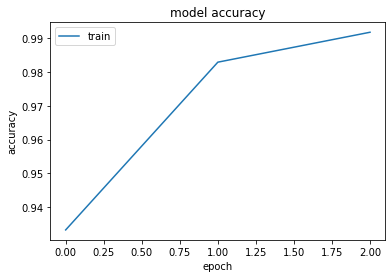

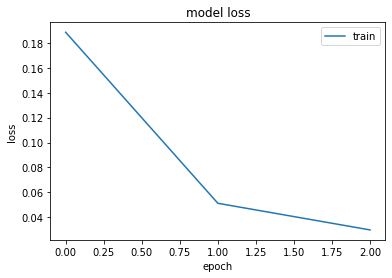

In [23]:
#bonus question
#accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()